<h1><center><strong>San Francisco Crime Classification Data Analysis</strong></center></h1>

Contributors:
- Kevin Reynolds
- Shivani Merchant
- Kyrsti Fitts
- Ryan Espejo

# Data Preprocessing 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings


# Silence warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Load training data and assign names to attributes
training_attribute_names = ["Dates", "Category", "Descript", "DayOfWeek", "PdDistrict", "Resolution", "Address", "X", "Y"]
training_data = pd.read_csv('data/train.csv', skiprows=1, names=training_attribute_names)

training_data.head()



,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Category Correlation Heat Map

Using a heat map to show the intensity of correlation between categories

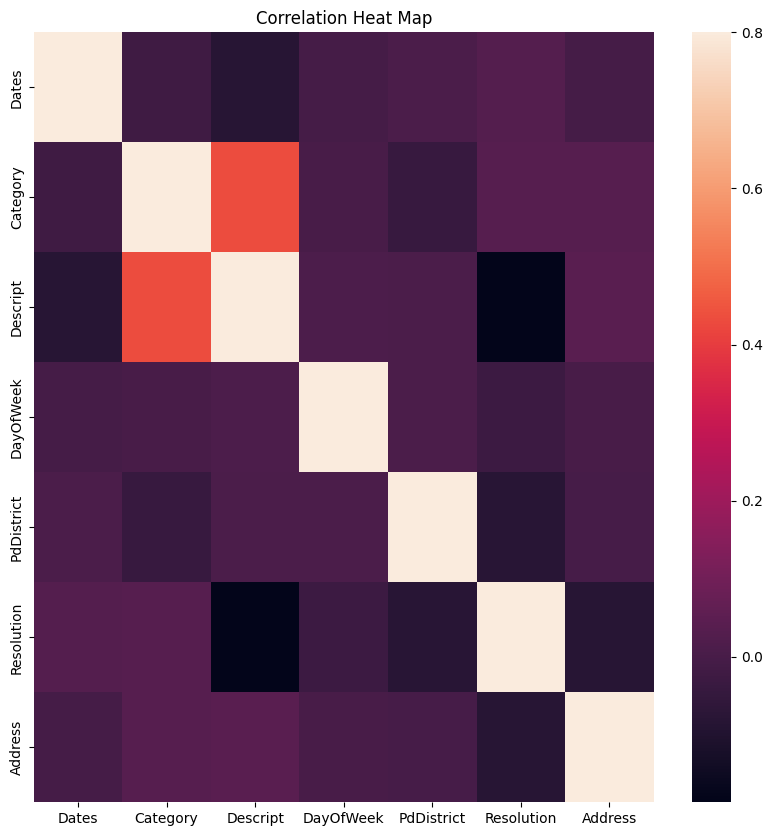

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

d = defaultdict(LabelEncoder)
train_data_encode = training_data.apply(lambda x: d[x.name].fit_transform(x))
train_data_encode = train_data_encode.drop(['X', 'Y'], axis = 1)

mat = train_data_encode.corr()
f, ax = plt.subplots(figsize=(10, 10))
plot2 =sns.heatmap(mat, vmax=.8);
plot2.axes.set_title('Correlation Heat Map')
plt.show()

Category Counts

Visualizing the count of crimes by the category and the number of counts in each category with a bar graph

Category
LARCENY/THEFT                  19.919162
OTHER OFFENSES                 14.370724
NON-CRIMINAL                   10.512397
ASSAULT                         8.755320
DRUG/NARCOTIC                   6.146696
VEHICLE THEFT                   6.125057
VANDALISM                       5.093679
WARRANTS                        4.807704
BURGLARY                        4.185985
SUSPICIOUS OCC                  3.577705
MISSING PERSON                  2.959858
ROBBERY                         2.619444
FRAUD                           1.899552
FORGERY/COUNTERFEITING          1.208247
SECONDARY CODES                 1.137180
WEAPON LAWS                     0.974319
PROSTITUTION                    0.852344
TRESPASS                        0.834350
STOLEN PROPERTY                 0.517055
SEX OFFENSES FORCIBLE           0.499744
DISORDERLY CONDUCT              0.492000
DRUNKENNESS                     0.487444
RECOVERED VEHICLE               0.357383
KIDNAPPING                      0.266614
DRIVING

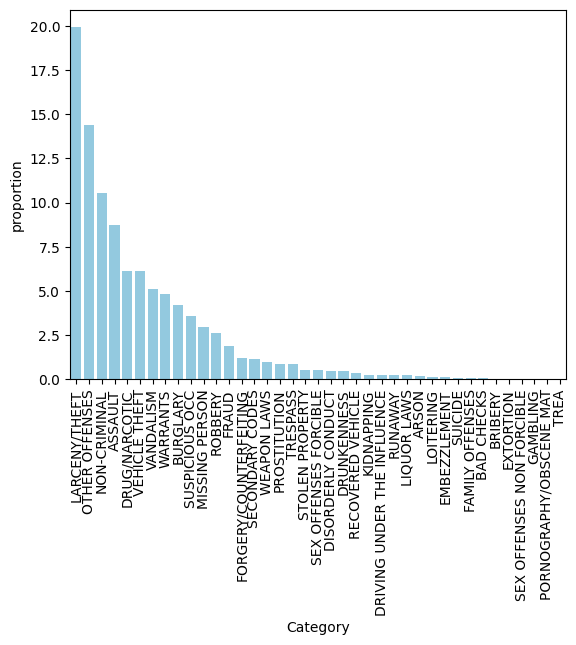

In [48]:
relevant_data = ["Dates", "DayOfWeek", "PdDistrict", "Address", "Category"]
training_data = training_data[relevant_data]
category_counts = training_data['Category'].value_counts(normalize=True) * 100

bar_plot = sns.barplot(x = category_counts.index, y = category_counts, color='skyblue')
bar_plot.set_xticklabels(category_counts.index, rotation = 90)

print(category_counts);

Bar Graph to show the amount of crimes now grouped by the district instead of the crime category

PdDistrict
SOUTHERN      17.901279
MISSION       13.656185
NORTHERN      11.992041
BAYVIEW       10.185195
CENTRAL        9.732942
TENDERLOIN     9.317134
INGLESIDE      8.979567
TARAVAL        7.470654
PARK           5.616201
RICHMOND       5.148801
Name: proportion, dtype: float64


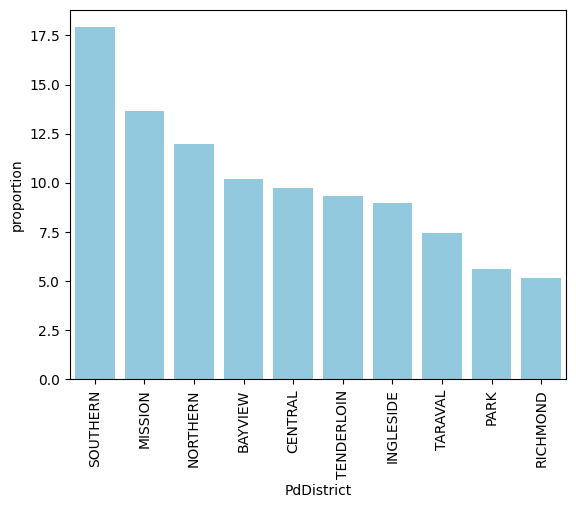

In [47]:
district_counts = training_data['PdDistrict'].value_counts(normalize=True) * 100

pd_bar_plot = sns.barplot(x = district_counts.index, y = district_counts, color='skyblue')
pd_bar_plot.set_xticklabels(district_counts.index, rotation = 90)

print(district_counts);

Heat map to compare the regularity of crime category with the district

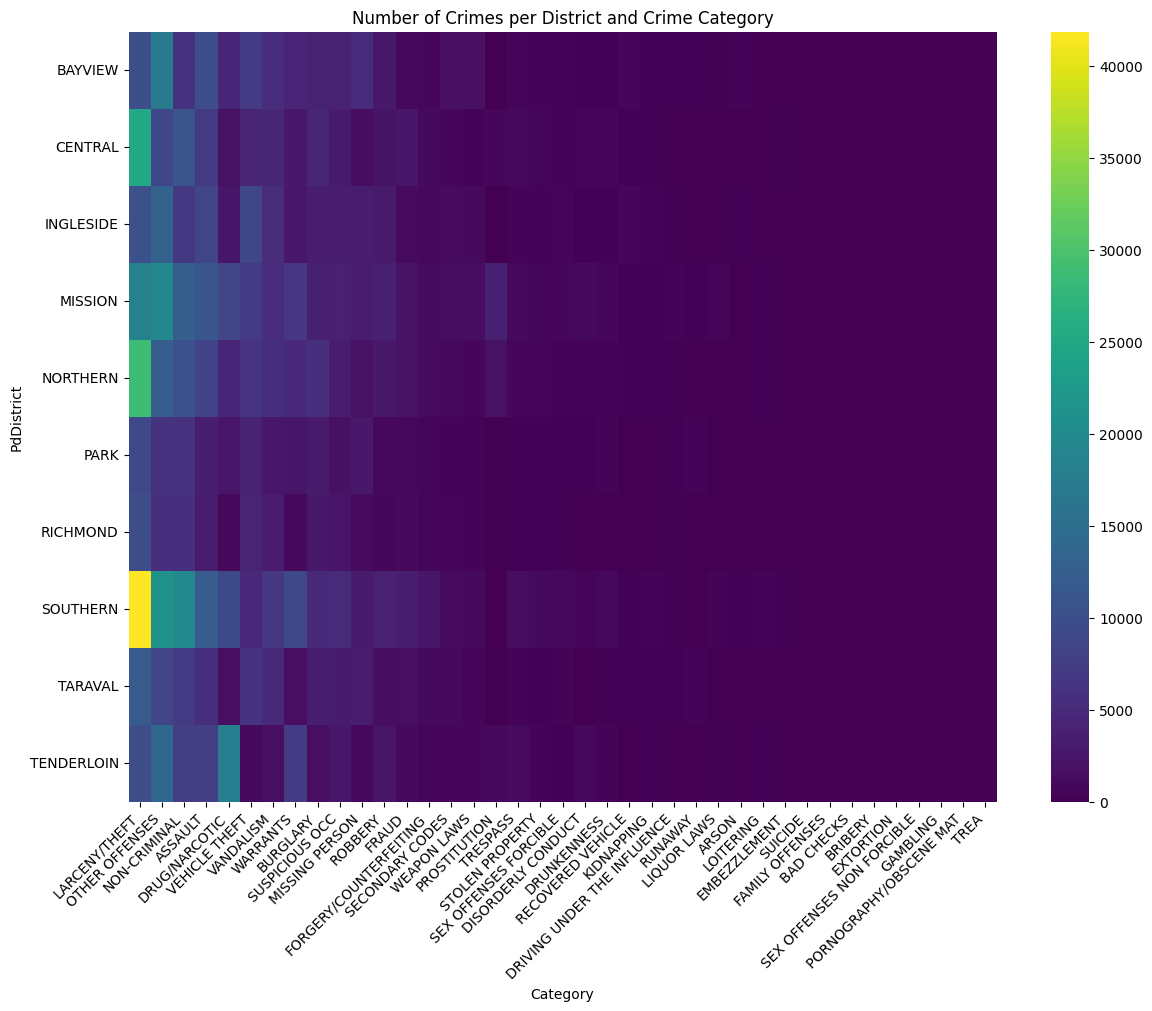

In [24]:
category_counts = training_data['Category'].value_counts(normalize=True) * 100
district_counts = training_data.groupby(['PdDistrict', 'Category']).size().unstack().fillna(0)

crime_pivot_table = pd.pivot_table(training_data, index="PdDistrict", columns="Category", aggfunc=len, fill_value=0)["Dates"]

crime_pivot_table = crime_pivot_table[category_counts.index]

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(crime_pivot_table, cmap='viridis')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per District and Crime Category')
plt.show()

Bar graph to show the proportion of crimes compared to the hour of the day

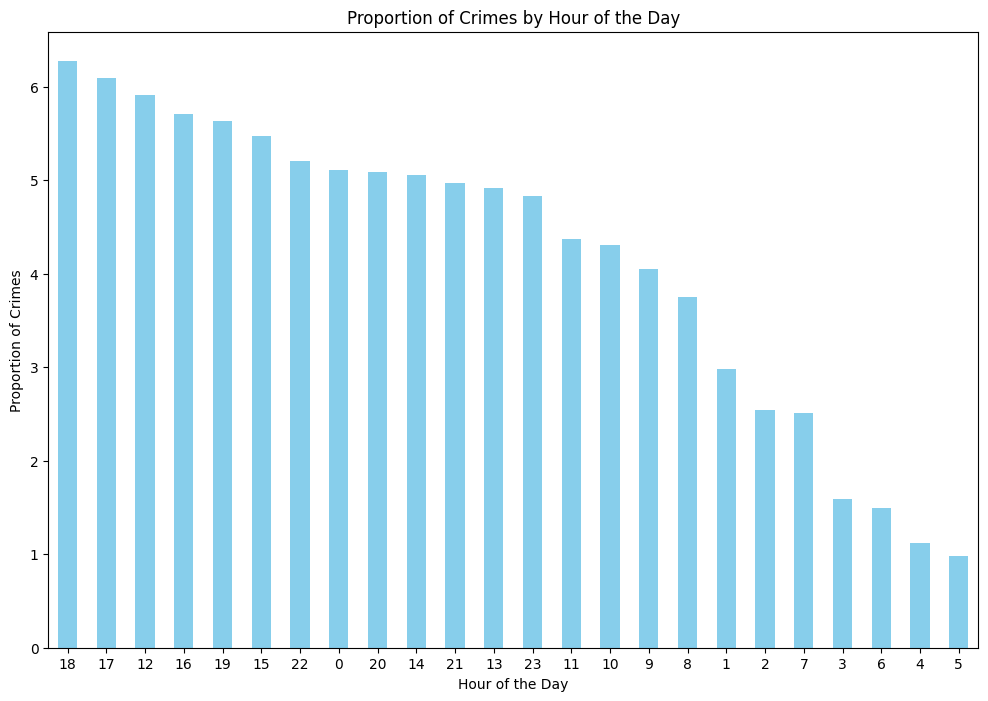

In [28]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])

training_data['Hour'] = training_data['Dates'].dt.hour

crimes_by_hour = training_data['Hour'].value_counts(normalize=True) * 100

# Plotting the data on a bar chart
plt.figure(figsize=(12, 8))
crimes_by_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Crimes')
plt.title('Proportion of Crimes by Hour of the Day')
plt.xticks(rotation=0)
plt.show()

Heat map comparing the hour of the crimes committed with the category of times committed and the frequency of the crimes committed

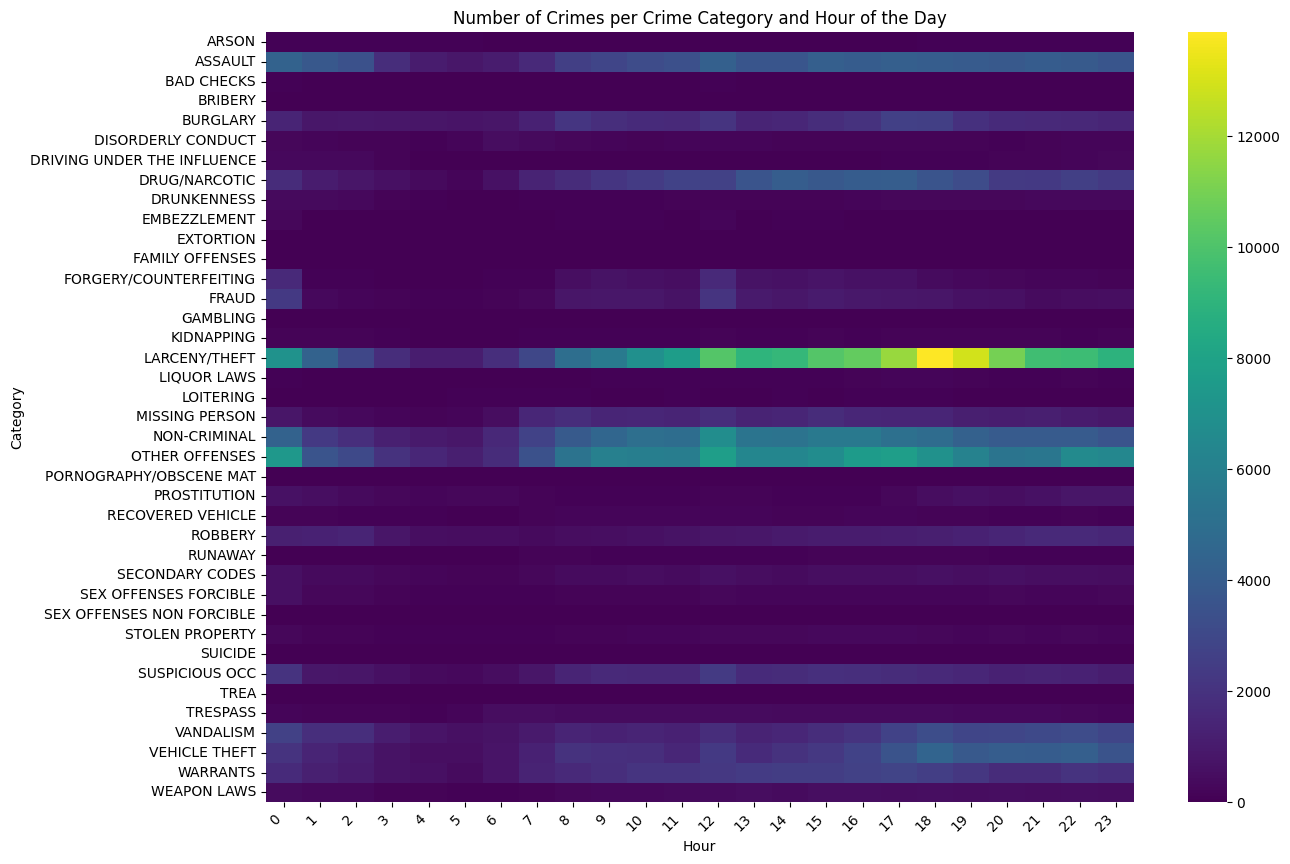

In [30]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])

training_data['Hour'] = training_data['Dates'].dt.hour
crime_pivot_table_hour = pd.pivot_table(training_data, index="Category", columns="Hour", aggfunc=len, fill_value=0)["Dates"]

crime_pivot_table_hour = crime_pivot_table_hour.reindex(sorted(crime_pivot_table_hour.columns), axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_hour = sns.heatmap(crime_pivot_table_hour, cmap='viridis')
heatmap_hour.set_xticklabels(heatmap_hour.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_hour.set_yticklabels(heatmap_hour.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Crime Category and Hour of the Day')
plt.show()

Heat map comparing the police district with the hour of the crime committed and the frequency of the crimes

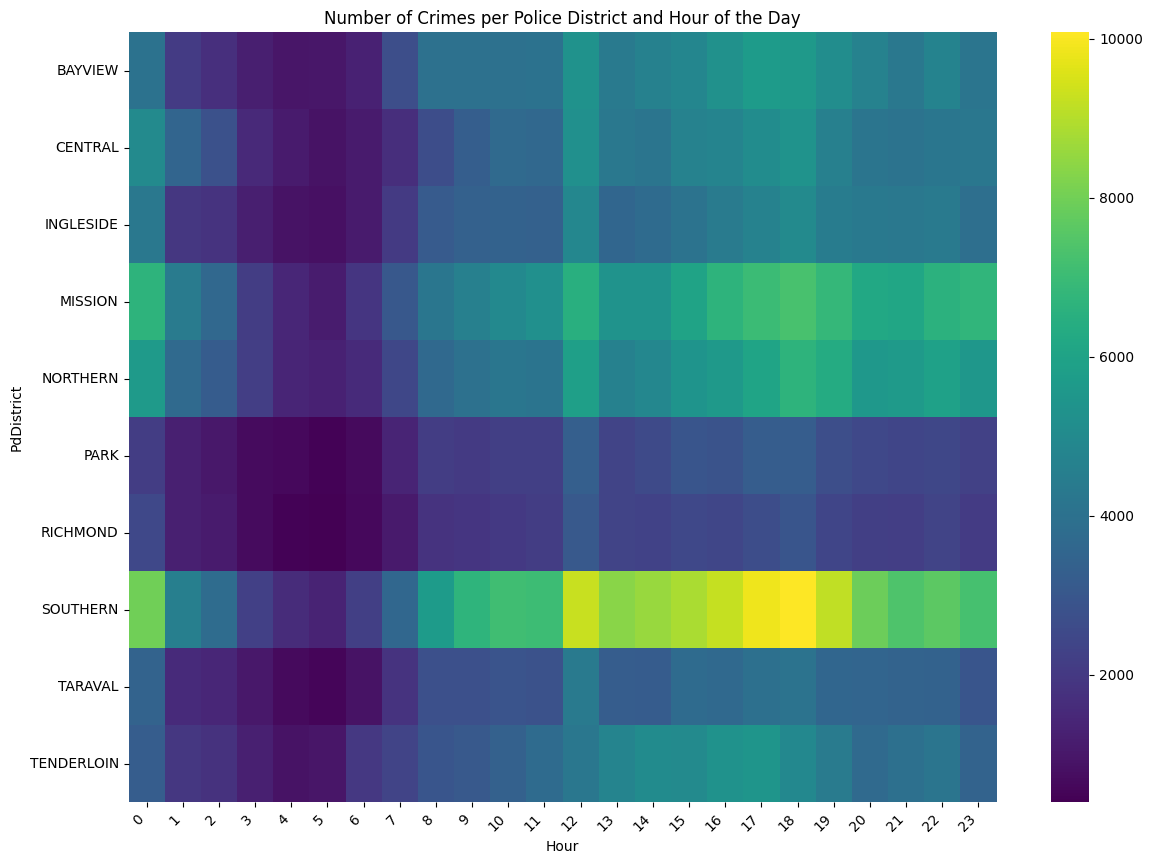

In [31]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['Hour'] = training_data['Dates'].dt.hour

crime_pivot_table_district_hour = pd.pivot_table(training_data, index="PdDistrict", columns="Hour", aggfunc=len, fill_value=0)["Dates"]
crime_pivot_table_district_hour = crime_pivot_table_district_hour.reindex(sorted(crime_pivot_table_district_hour.columns), axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_district_hour = sns.heatmap(crime_pivot_table_district_hour, cmap='viridis')
heatmap_district_hour.set_xticklabels(heatmap_district_hour.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_district_hour.set_yticklabels(heatmap_district_hour.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Police District and Hour of the Day')
plt.show()

Bar chart comparing the number of crimes committed and the day of the week

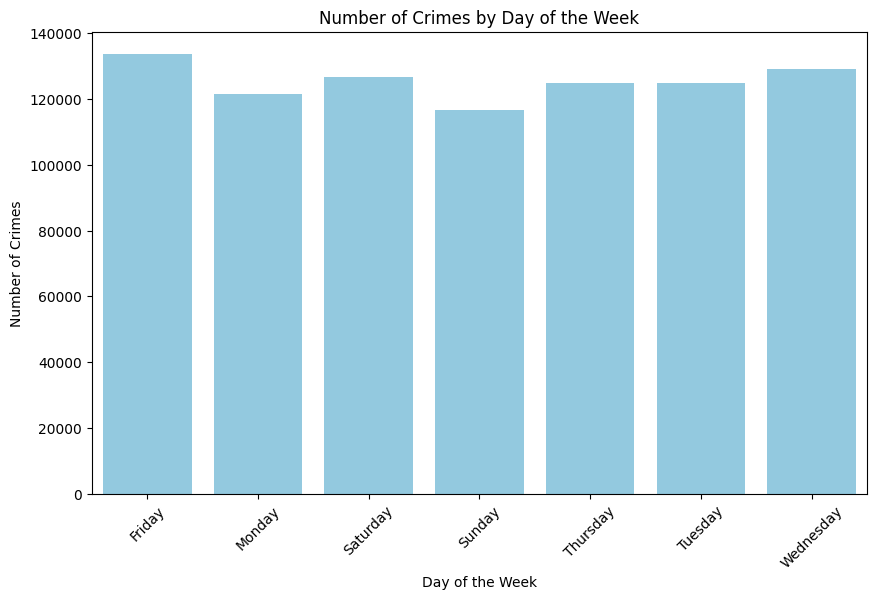

In [49]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['DayOfWeek'] = training_data['Dates'].dt.day_name()
crimes_by_day_of_week = training_data['DayOfWeek'].value_counts().sort_index()

# Plotting the data on a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=crimes_by_day_of_week.index, y=crimes_by_day_of_week, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Day of the Week')
plt.xticks(rotation=45)
plt.show()

Heat map comparing the day of the week and the crime category along with the frequency of the crime committed

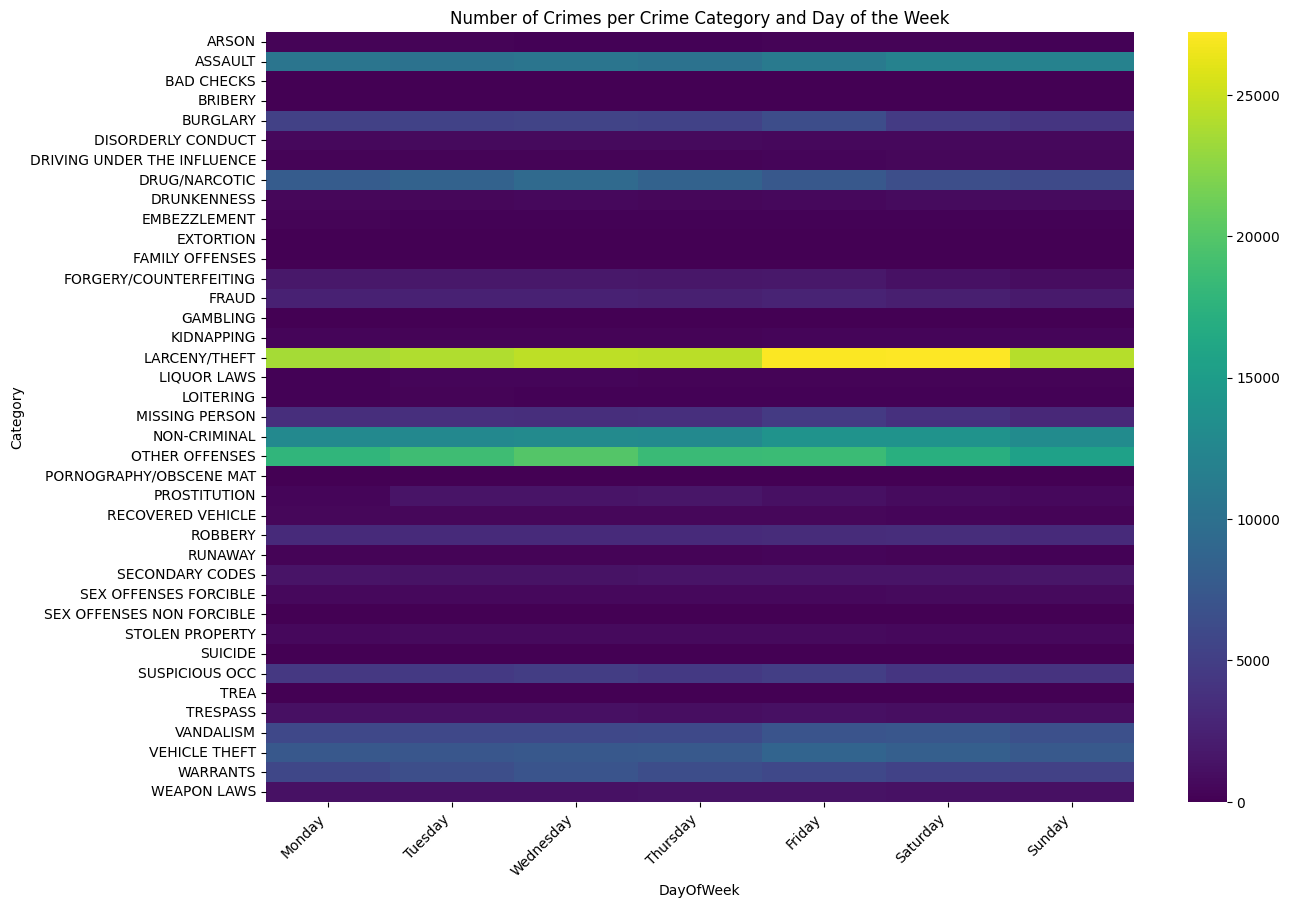

In [33]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['DayOfWeek'] = training_data['Dates'].dt.day_name()
crime_pivot_table_day_of_week = pd.pivot_table(training_data, index="Category", columns="DayOfWeek", aggfunc=len, fill_value=0)["Dates"]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_pivot_table_day_of_week = crime_pivot_table_day_of_week[days_order]

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_day_of_week = sns.heatmap(crime_pivot_table_day_of_week, cmap='viridis')
heatmap_day_of_week.set_xticklabels(heatmap_day_of_week.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_day_of_week.set_yticklabels(heatmap_day_of_week.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Crime Category and Day of the Week')
plt.show()

Heat map comparing day of week and the district the crime was committed in along with the frequency of the crime

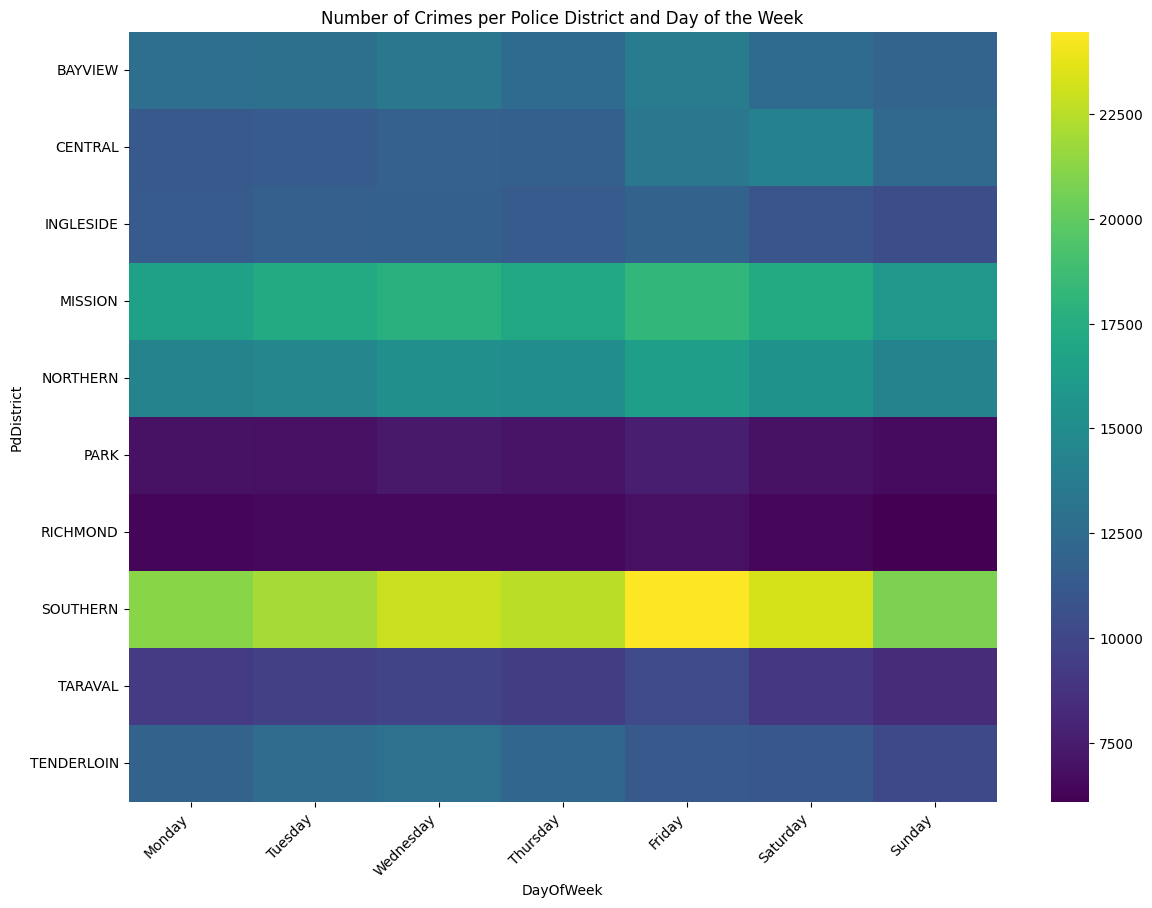

In [34]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['DayOfWeek'] = training_data['Dates'].dt.day_name()
crime_pivot_table_day_of_week_district = pd.pivot_table(training_data, index="PdDistrict", columns="DayOfWeek", aggfunc=len, fill_value=0)["Dates"]

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_pivot_table_day_of_week_district = crime_pivot_table_day_of_week_district[days_order]

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_day_of_week_district = sns.heatmap(crime_pivot_table_day_of_week_district, cmap='viridis')
heatmap_day_of_week_district.set_xticklabels(heatmap_day_of_week_district.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_day_of_week_district.set_yticklabels(heatmap_day_of_week_district.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Police District and Day of the Week')
plt.show()

Comparing the number of crimes committed with the day of the month

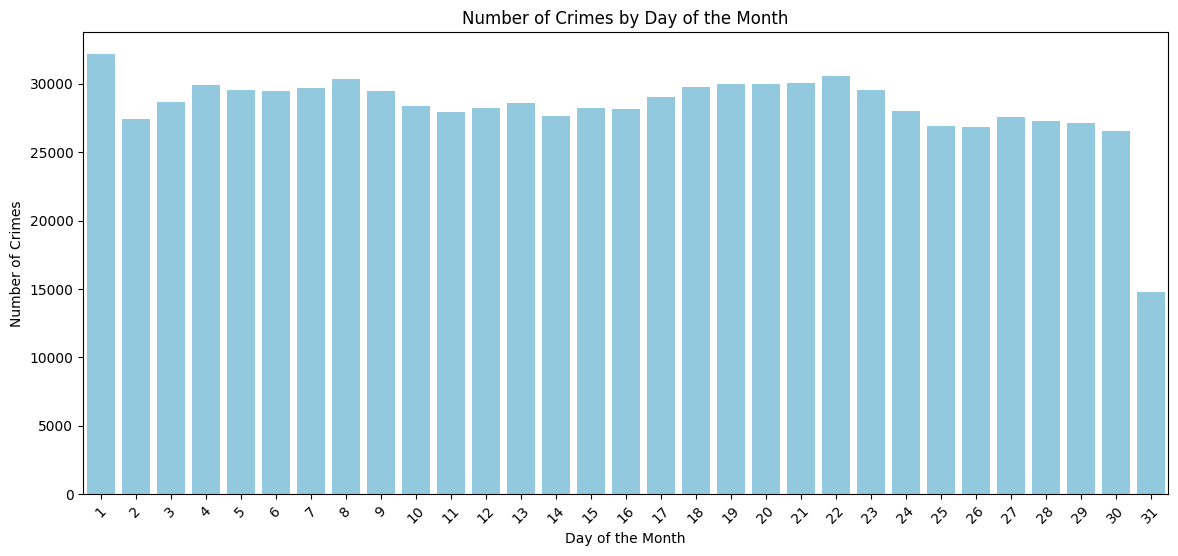

In [35]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['DayOfMonth'] = training_data['Dates'].dt.day
crimes_by_day_of_month = training_data['DayOfMonth'].value_counts().sort_index()

# Plotting the data on a bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=crimes_by_day_of_month.index, y=crimes_by_day_of_month, color='skyblue')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Day of the Month')
plt.xticks(rotation=45)
plt.show()

Heat map comparing day of month and category of crime along with the frequency of the crimes committed

-drop off towards end of month is probably because not every month has a 31st day

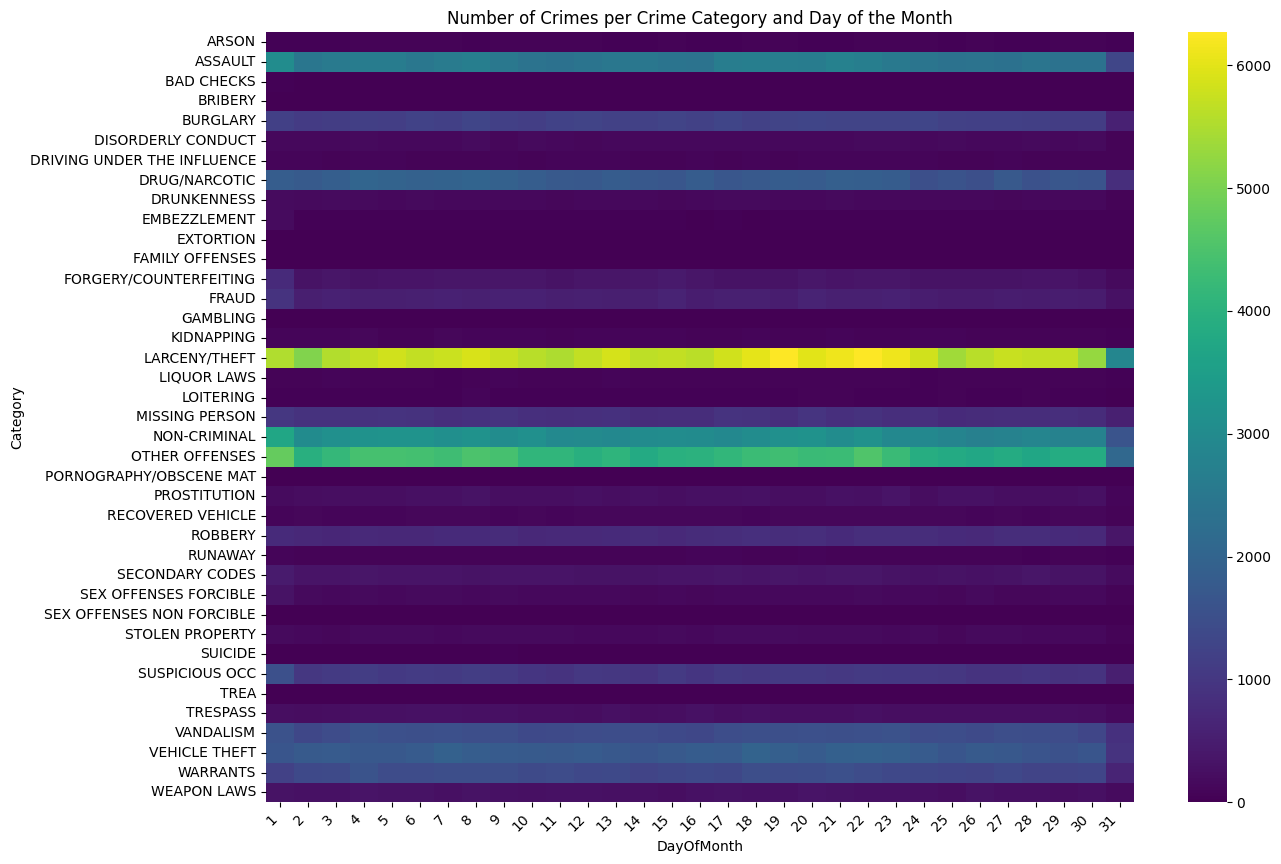

In [36]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['DayOfMonth'] = training_data['Dates'].dt.day
crime_pivot_table_day_of_month = pd.pivot_table(training_data, index="Category", columns="DayOfMonth", aggfunc=len, fill_value=0)["Dates"]
crime_pivot_table_day_of_month = crime_pivot_table_day_of_month.sort_index(axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_day_of_month = sns.heatmap(crime_pivot_table_day_of_month, cmap='viridis')
heatmap_day_of_month.set_xticklabels(heatmap_day_of_month.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_day_of_month.set_yticklabels(heatmap_day_of_month.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Crime Category and Day of the Month')
plt.show()

Heat map comparing day of month and district

-drop off towards end of month is probably because not every month has a 31st day

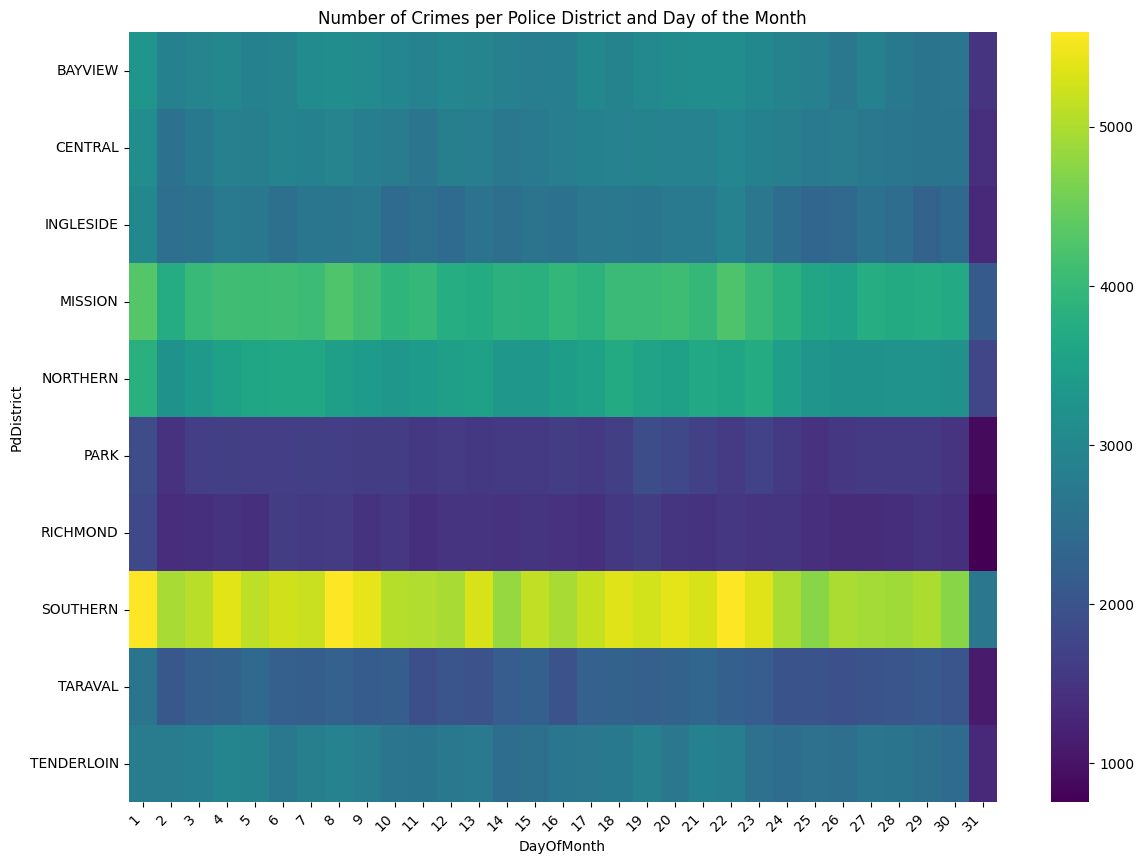

In [37]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['DayOfMonth'] = training_data['Dates'].dt.day
crime_pivot_table_day_of_month_district = pd.pivot_table(training_data, index="PdDistrict", columns="DayOfMonth", aggfunc=len, fill_value=0)["Dates"]
crime_pivot_table_day_of_month_district = crime_pivot_table_day_of_month_district.sort_index(axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_day_of_month_district = sns.heatmap(crime_pivot_table_day_of_month_district, cmap='viridis')
heatmap_day_of_month_district.set_xticklabels(heatmap_day_of_month_district.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_day_of_month_district.set_yticklabels(heatmap_day_of_month_district.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Police District and Day of the Month')
plt.show()


Bar chart comparing the number of crimes committed and the month of the year

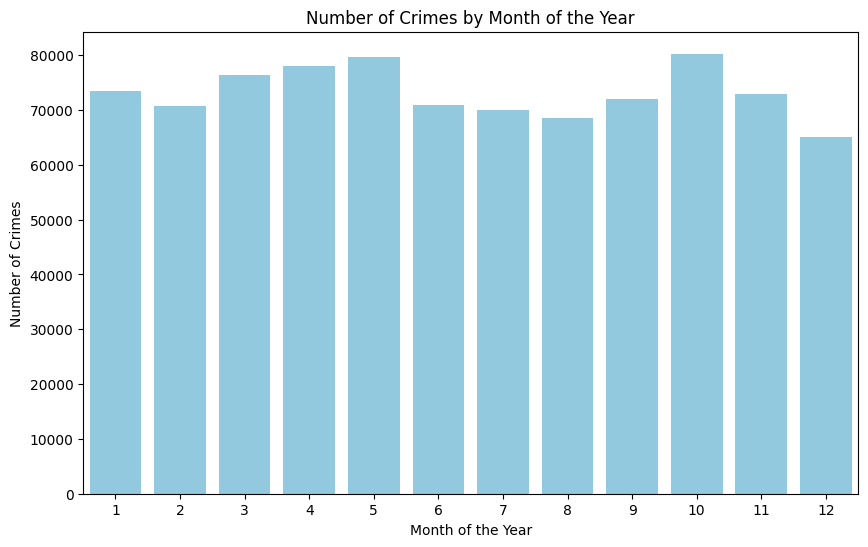

In [39]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['Month'] = training_data['Dates'].dt.month
crimes_by_month = training_data['Month'].value_counts().sort_index()

# Plotting the data on a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=crimes_by_month.index, y=crimes_by_month, color='skyblue')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Month of the Year')
plt.xticks(rotation=0)
plt.show()

Heat map comparing the category of crime committed with the month of the year and the frequency of the crime

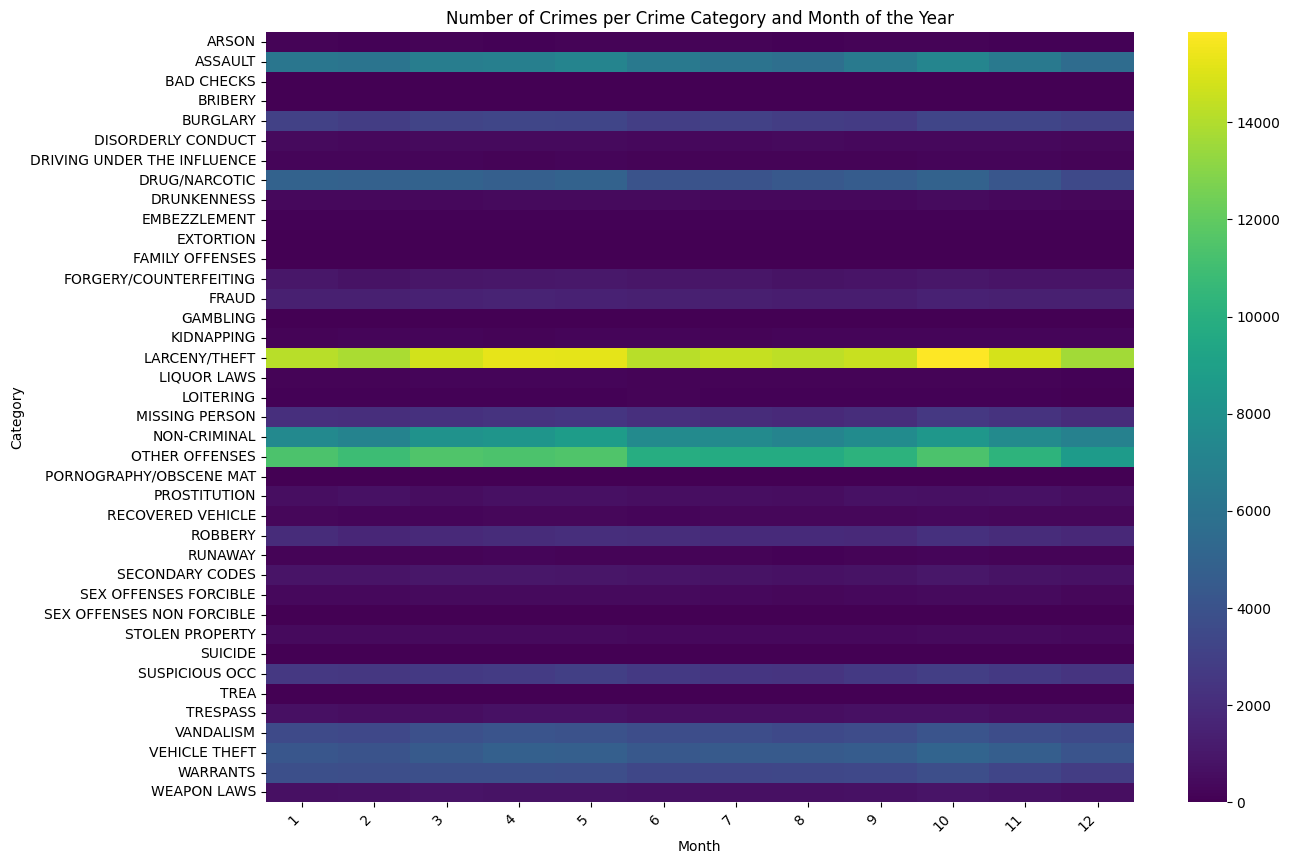

In [40]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['Month'] = training_data['Dates'].dt.month
crime_pivot_table_month = pd.pivot_table(training_data, index="Category", columns="Month", aggfunc=len, fill_value=0)["Dates"]
crime_pivot_table_month = crime_pivot_table_month.sort_index(axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_month = sns.heatmap(crime_pivot_table_month, cmap='viridis')
heatmap_month.set_xticklabels(heatmap_month.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_month.set_yticklabels(heatmap_month.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Crime Category and Month of the Year')
plt.show()

Heat map comparing the police district that the crime was committed in and the month of the year along with the frequency of the crime

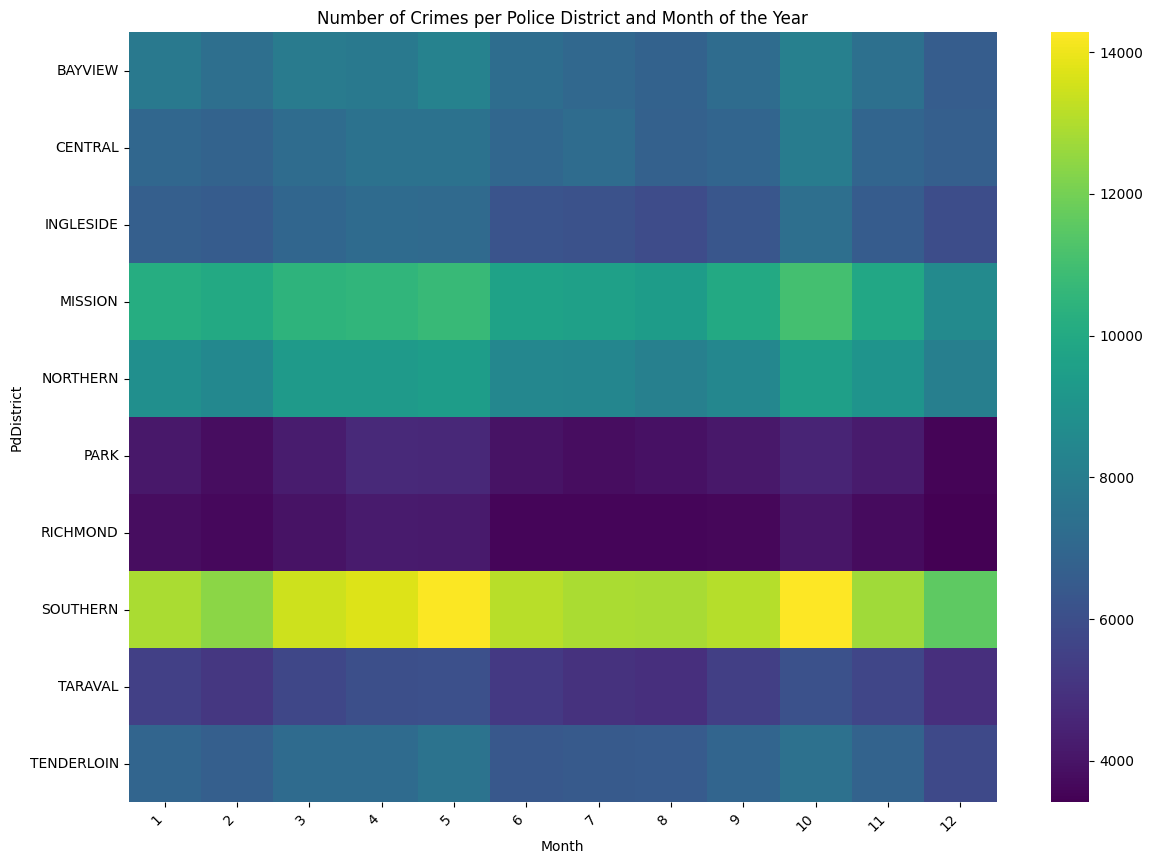

In [41]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['Month'] = training_data['Dates'].dt.month
crime_pivot_table_month_district = pd.pivot_table(training_data, index="PdDistrict", columns="Month", aggfunc=len, fill_value=0)["Dates"]
crime_pivot_table_month_district = crime_pivot_table_month_district.sort_index(axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_month_district = sns.heatmap(crime_pivot_table_month_district, cmap='viridis')
heatmap_month_district.set_xticklabels(heatmap_month_district.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_month_district.set_yticklabels(heatmap_month_district.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Police District and Month of the Year')
plt.show()


A bar graph comparing the number of crimes committed accross all years

- 2015 data is only partially in the training data, the other half is in the test data so it wont be acurate

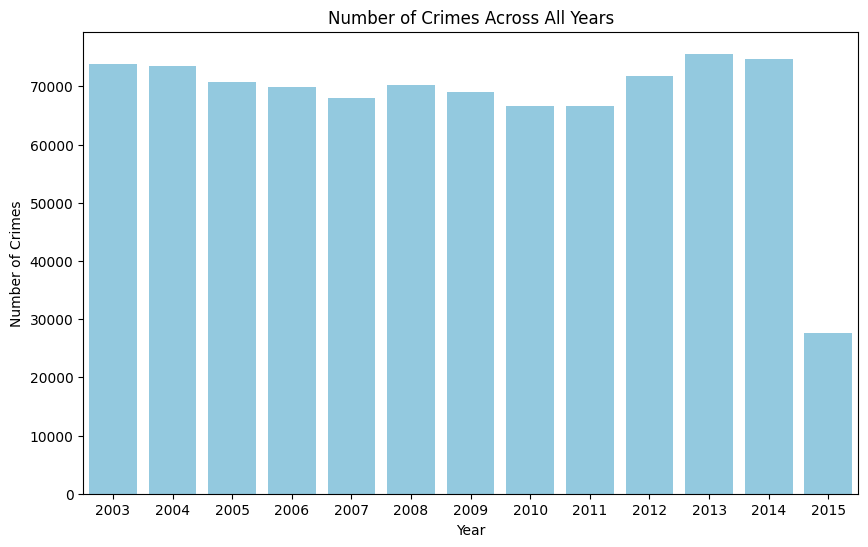

In [42]:
training_data['Dates'] = pd.to_datetime(training_data['Dates'])
training_data['Year'] = training_data['Dates'].dt.year
crimes_by_year = training_data['Year'].value_counts().sort_index()

# Plotting the data on a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=crimes_by_year.index, y=crimes_by_year, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Across All Years')
plt.xticks(rotation=0)
plt.show()


Bar graph of the top 5 crime categories by count

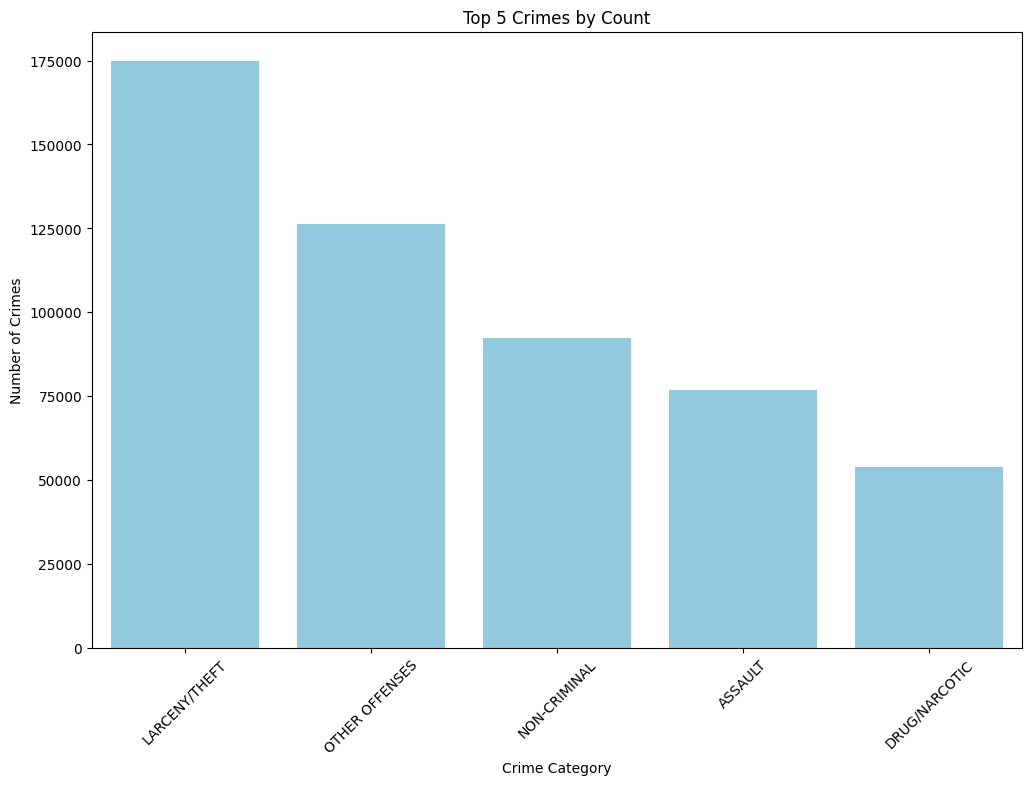

In [44]:
crime_counts = training_data['Category'].value_counts()
top5_crimes = crime_counts.head(5)

# Plotting the data on a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top5_crimes.index, y=top5_crimes, color='skyblue')
plt.xlabel('Crime Category')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Crimes by Count')
plt.xticks(rotation=45)
plt.show()

Heat map of top 5 crime categories by district along with the frequency of the crimes

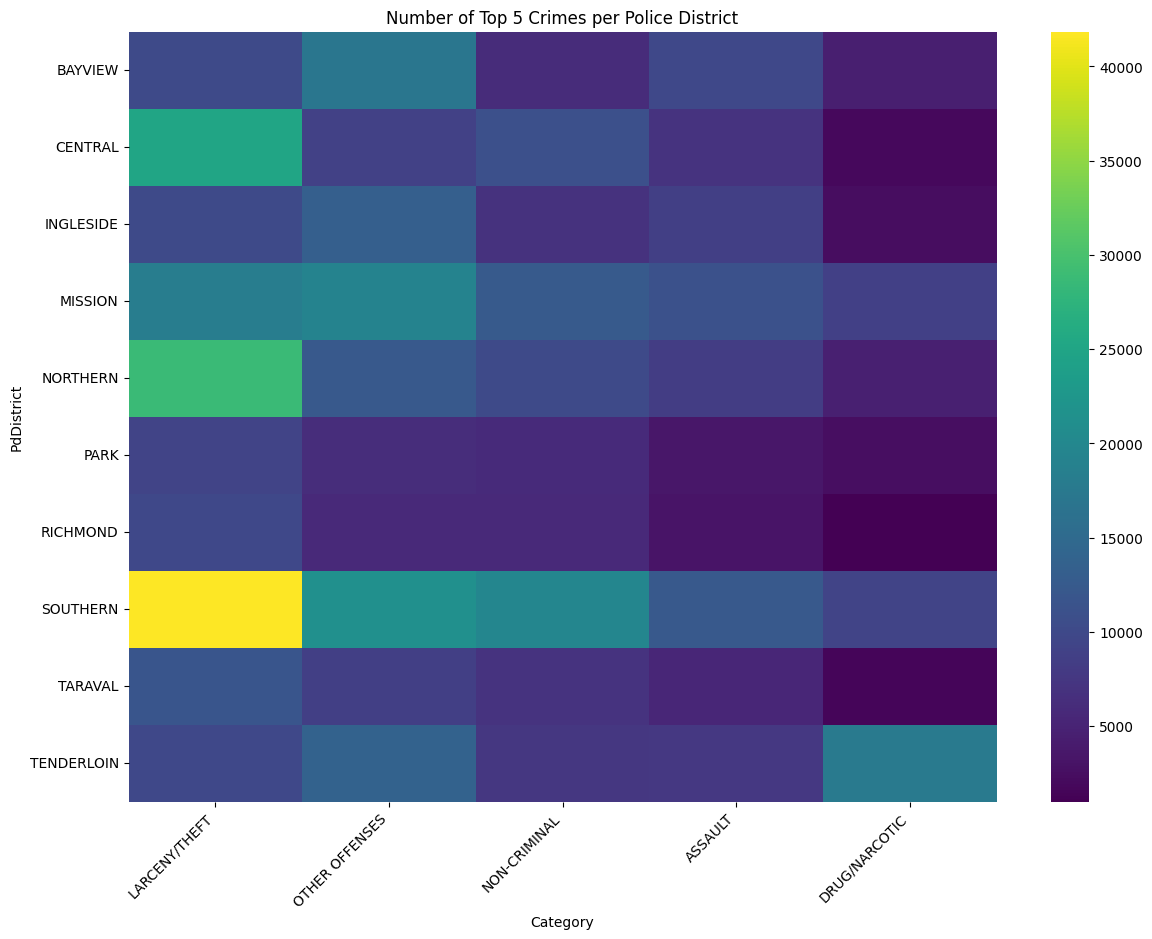

In [45]:
crime_counts = training_data['Category'].value_counts()
top5_crimes = crime_counts.head(5).index
top5_data = training_data[training_data['Category'].isin(top5_crimes)]
crime_pivot_table_district_top5 = pd.pivot_table(top5_data, index="PdDistrict", columns="Category", aggfunc=len, fill_value=0)["Dates"]
crime_pivot_table_district_top5 = crime_pivot_table_district_top5[top5_crimes]

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_district_top5 = sns.heatmap(crime_pivot_table_district_top5, cmap='viridis')
heatmap_district_top5.set_xticklabels(heatmap_district_top5.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_district_top5.set_yticklabels(heatmap_district_top5.get_yticklabels(), rotation=0)
plt.title('Number of Top 5 Crimes per Police District')
plt.show()
